### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
import time
import os

mlxtend is more suitable for this grocery senario, it provides a simple and flexible interface for performing frequent itemset mining and association rule analysis (Hash 2019).

### Read dataset

In [2]:
# read training dataset
df = pd.read_csv('Groceries data train.csv')
# it is already train data, so there might not be necessary to clean data.
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1


### Data processing

group data by member, so that we can condense the data to extract parttern 

In [3]:

# Group by member number, and merge all item descriptions purchased by one member together
transactions = df.groupby(['Member_number'])['itemDescription'].apply(list)

print(transactions)

Member_number
1000    [sausage, sausage, misc. beverages, canned bee...
1001    [rolls/buns, frankfurter, soda, soda, whole mi...
1002    [frozen vegetables, sugar, whole milk, tropica...
1003    [root vegetables, dental care, rolls/buns, sau...
1004    [other vegetables, canned beer, cling film/bag...
                              ...                        
4996    [dessert, bottled water, salty snack, decalcif...
4997    [canned beer, tropical fruit, white wine, grapes]
4998                                   [rolls/buns, curd]
4999    [newspapers, kitchen towels, onions, napkins, ...
5000    [soda, other vegetables, onions, fruit/vegetab...
Name: itemDescription, Length: 3872, dtype: object


Mlxtend requires data in a one-hot encoded pandas DataFrame, therefore, we need to encode data

In [4]:
# TransactionEncoder expects a list as input
# therefore, convert Panda series form to list
transactions = transactions.values.tolist()
print(transactions)

[['sausage', 'sausage', 'misc. beverages', 'canned beer', 'yogurt', 'soda', 'pickled vegetables', 'pastry'], ['rolls/buns', 'frankfurter', 'soda', 'soda', 'whole milk', 'whole milk', 'white bread', 'beef', 'whipped/sour cream', 'curd', 'sausage'], ['frozen vegetables', 'sugar', 'whole milk', 'tropical fruit', 'butter milk', 'butter'], ['root vegetables', 'dental care', 'rolls/buns', 'sausage', 'detergent'], ['other vegetables', 'canned beer', 'cling film/bags', 'pip fruit', 'dish cleaner', 'hygiene articles', 'whole milk', 'shopping bags', 'frozen fish', 'chocolate', 'red/blush wine', 'whole milk', 'rolls/buns', 'whole milk', 'pastry'], ['whipped/sour cream', 'rolls/buns', 'rolls/buns', 'margarine'], ['softener', 'chicken', 'shopping bags', 'bottled beer', 'frankfurter', 'rice', 'rolls/buns', 'chocolate', 'frankfurter', 'flour'], ['photo/film', 'tropical fruit', 'white wine', 'dessert', 'domestic eggs', 'hamburger meat', 'yogurt', 'liver loaf'], ['yogurt', 'pastry', 'tropical fruit', '

In [5]:
# encode df to pandas DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encode = pd.DataFrame(te_ary, columns=te.columns_)

### Select Frequent Itemset Mining Algorithm

Based on execution time and the quantity with changing of min_support value

In [6]:
# List to hold timing results
apriori_times = []
fpgrowth_times = []
# Lists to hold itemset counts
apriori_counts = []
fpgrowth_counts = []
# update the max length of itemset
max_length_apriori = 0
max_length_fpgrowth = 0

In [7]:
# List of min_support values
min_supports = np.linspace(0.01, 0.09, 9)

In [8]:
# Compare the two algorithms over a range of min_support values
for min_support in min_supports:
    # Run Apriori and record execution time
    start = time.time()
    apriori_itemsets = apriori(df_encode, min_support=min_support, use_colnames=True)
    end = time.time()
    apriori_times.append(end - start)
    apriori_counts.append(len(apriori_itemsets))
    # Update maximum length if necessary
    for itemset in apriori_itemsets['itemsets']:
        if len(itemset) > max_length_apriori:
            max_length_apriori = len(itemset)

    # Run FP-Growth and record execution time
    start = time.time()
    fpgrowth_itemsets = fpgrowth(df_encode, min_support=min_support, use_colnames=True)
    end = time.time()
    fpgrowth_times.append(end - start)
    fpgrowth_counts.append(len(fpgrowth_itemsets))
    # Update maximum length if necessary
    for itemset in fpgrowth_itemsets['itemsets']:
        if len(itemset) > max_length_fpgrowth:
            max_length_fpgrowth = len(itemset)

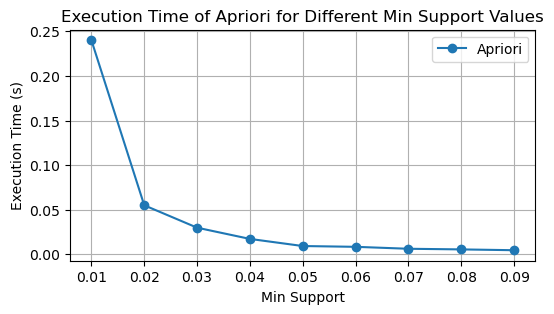

In [9]:
# Plot timing results
plt.figure(figsize=(6, 3))
plt.plot(min_supports, apriori_times, label='Apriori', marker='o')
plt.plot(min_supports, fpgrowth_times, label='FP-Growth', marker='o')
plt.xlabel('Min Support')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Apriori and FP-Growth for Different Min Support Values')
plt.legend()
plt.grid(True)
plt.show()

As can be seen that the execution time for Apriori is lower than that of FP-Growth.

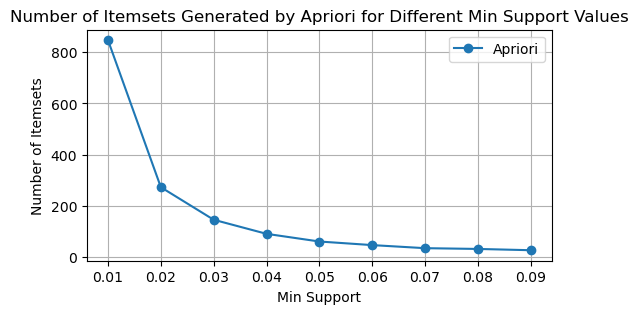

In [10]:
# Plot itemset counts
plt.figure(figsize=(6, 3))
plt.plot(min_supports, apriori_counts, label='Apriori', marker='o')
plt.xlabel('Min Support')
plt.ylabel('Number of Itemsets')
plt.title('Number of Itemsets Generated by Apriori for Different Min Support Values')
plt.legend()
plt.grid(True)
plt.show()

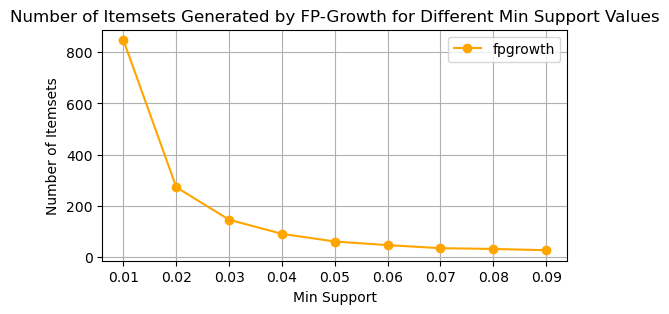

In [11]:
# Plot itemset counts
plt.figure(figsize=(6, 3))
plt.plot(min_supports, fpgrowth_counts, label='fpgrowth', marker='o',color='orange')
plt.xlabel('Min Support')
plt.ylabel('Number of Itemsets')
plt.title('Number of Itemsets Generated by FP-Growth for Different Min Support Values')
plt.legend()
plt.grid(True)
plt.show()

Here the number of itemsets they generated based on different min support value are the same, also, the min_support parameter should be set from 0.01 to 0.04, but 0.01 has too much data, and the lower the parameter value, the lower the occurrence frequency. In conclusion, it is better to choose Aprior with min_support parameter value from 0.02 to 0.04.

### Choose parameters' value

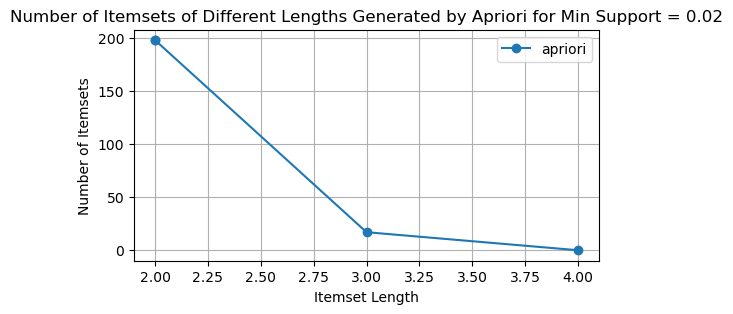

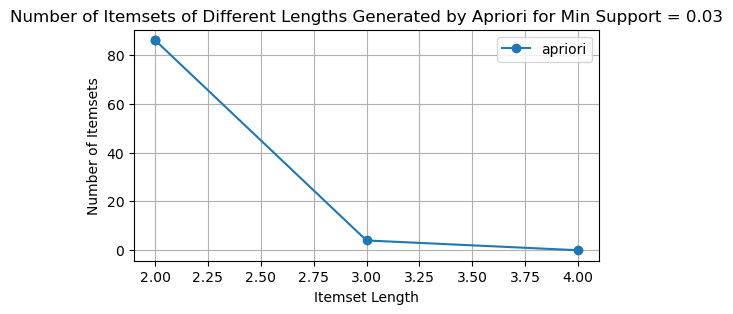

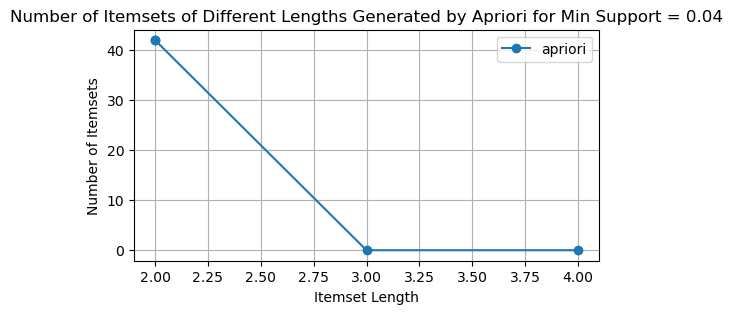

In [12]:
min_supports=[0.02,0.03,0.04]

for min_support in min_supports:
    frequent_itemsets = apriori(df_encode, min_support=min_support, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    # go through itemsets length from 1 to the max length of itemsets in the frequent itemsets lists
    frequent_itemsets_lens = np.linspace(2, max_length_apriori, max_length_apriori, dtype=int)
    
    frequent_itemsets_counts = []
    # generate different itemsets with different min_support and the least amount of item
    for frequent_itemsets_len in frequent_itemsets_lens:
        filtered_itemsets = frequent_itemsets[frequent_itemsets['length'] >= frequent_itemsets_len]
        frequent_itemsets_counts.append(len(filtered_itemsets))
    
    # Plot 
    plt.figure(figsize=(6, 3))
    plt.plot(frequent_itemsets_lens, frequent_itemsets_counts, label='apriori', marker='o')
    plt.xlabel('Itemset Length')
    plt.ylabel('Number of Itemsets')
    plt.title(f'Number of Itemsets of Different Lengths Generated by Apriori for Min Support = {min_support}')
    plt.legend()
    plt.grid(True)
    plt.show()

   

we can see that only the length of itemsets more than 1 and 2 is meaningful. 

### Generate patterns

In [13]:
 
min_supports=[0.02,0.03,0.04]
frequent_itemsets_lens=[2,3]

for min_support in min_supports:
    for frequent_itemsets_len in frequent_itemsets_lens:
        frequent_itemsets = apriori(df_encode, min_support=min_support, use_colnames=True)
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        frequent_itemsets_temp = frequent_itemsets[frequent_itemsets['length'] >= frequent_itemsets_len]
        # Create output directory if it does not exist
        directory = f'./min_support_{str(min_support)}'
        if not os.path.exists(directory):
            os.makedirs(directory)

        # Write frequent_itemsets_temp to CSV
        frequent_itemsets_temp.to_csv(directory + f'/frequent_itemsets_GTE{str(frequent_itemsets_len)}.csv', index=False)

Reference:
Harsh 2019, Association Analysis in Python-Frequent Item set Mining using Apriori algorithm in Python,
Analytics Vidhya, viewed 17 May 2023,
<https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c>.

